# Geographic map

Install packages in new env `conda activate geo_env`

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd
import seaborn as sns

%matplotlib inline

/scratch/lfloerl/.condaenvs/geo_env/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('/home/lfloerl/microterroir/Microbiome/Metadata/ITS_lavaux.tsv', sep='\t')
df.columns 

Index(['id', 'SAMPLE_NAME', 'Fungal conc. (ng/uL)', 'Collection_ID',
       'sample_type', 'Plot_ID', 'COLLECTION_DATE', 'Replicate', 'Time_point',
       'Year', 'Year_Cat', 'Fermentation_Timepoint', 'Plot', 'Altitude',
       'Average_slope', 'Exposition', 'Min_radiation', 'Max_radiation',
       'Average_radiation', 'Soil_thickness', 'Soil_type', 'Soil_depth',
       'Hydromorphie', 'Hydromorphie_code', 'Geology', 'Coordinates',
       'Latitude', 'Longitude', 'Quadrant', 'Cluster',
       'Plot_PCA_kMeans_Cluster', 'washed'],
      dtype='object')

In [6]:
# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326")

# Convert to web mercator (needed for contextily basemap)
gdf = gdf.to_crs(epsg=3857)

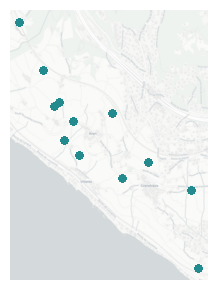

In [14]:
# Plot
fig, ax = plt.subplots(figsize=(4,3))

# colors:  '#481568FF', 2022: '#238A8DFF', 2023: '#FDE725FF'}

gdf.plot(ax=ax, color='#238A8DFF', markersize=20)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, attribution=False)  

# Remove axis labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_frame_on(False)

plt.tight_layout()
plt.savefig('/home/lfloerl/cloud/lfloerl/Microterroir/Figures/Lavaux-map.png', dpi=1000, bbox_inches='tight', pad_inches=0)
plt.show()

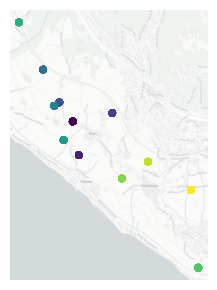

In [16]:
# Generate evenly spaced colors across the full Viridis palette
unique_plots = sorted(gdf['Plot'].unique())  # Sort to maintain order
num_plots = len(unique_plots)
palette = sns.color_palette("viridis", as_cmap=True)  # Get the full colormap

# Map colors across the entire Viridis range
color_map = {plot: palette(i / (num_plots - 1)) for i, plot in enumerate(unique_plots)}
gdf['color'] = gdf['Plot'].map(color_map)

# Plot
fig, ax = plt.subplots(figsize=(4, 3))

gdf.plot(ax=ax, color=gdf['color'], markersize=20)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, attribution=False)

# Remove axis labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_frame_on(False)

# Save without white space
plt.tight_layout()
#plt.savefig('/home/lfloerl/cloud/lfloerl/Microterroir/Figures/Lavaux-map.png', dpi=1000, bbox_inches='tight', pad_inches=0)
plt.show()